<a href="https://colab.research.google.com/github/amandasbassani/Notebooks_Processamento_Digital_de_Imagens/blob/main/Lista_2_Amanda_Schneider_Bassani.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2ª Lista de Exercícios de Processamento Digital de Imagens - 2022-1 (Graduação)
### Aluno(a): Amanda Schneider Bassani
### Data de Entrega: 06/08/2022

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
import matplotlib.pyplot as plt
import os
import numpy as np
import skimage.io
from PIL import Image
from skimage import morphology
import cv2

## Questão 1

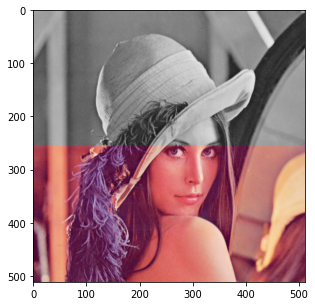

(512, 512, 3)

In [ ]:
# Carrega a imagem original
im = np.array(plt.imread('/content/drive/MyDrive/PDI/Listas/Lista2/mistura.tif'))

plt.figure(figsize = (5,5))
plt.imshow(im)
plt.show() 
im.shape


In [ ]:
def normalized_channels(image):
    if np.max(image) > 1:
        image = image/255
    return image[:,:,0],image[:,:,1],image[:,:,2]


def RGB2HSI(image):
    image_convert = np.zeros(image.shape,dtype=np.uint64)
    [R,G,B] = normalized_channels(image)

    H = np.zeros(R.shape)
    num = 1/2 * ((R-G)+(R-B))
    den = 0.000001 + np.sqrt((R-G)**2+(R-B)*(G-B))
    theta = np.rad2deg(np.arccos(num/den))
    H[B<=G] = theta[B<=G]
    H[B>G] = 360 - theta[B>G]



    H = H / 360
    S = 1 - 3*np.minimum(np.minimum(R,G),B)/((R+G+B)+0.000001)
    I = 1/3 * (R+G+B)

    image_convert[:,:,0] = H * 255
    image_convert[:,:,1] = S * 255
    image_convert[:,:,2] = I * 255

    return image_convert



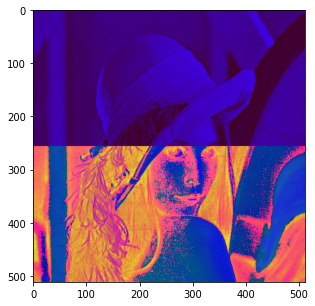

(512, 512, 3)

In [ ]:
im_HSI = RGB2HSI(im)

plt.figure(figsize = (5,5))
plt.imshow(im_HSI)
plt.show() 
im_HSI.shape

In [ ]:
def HSI2RGB(image):
    image_convert = np.zeros(image.shape,dtype=np.uint64)
    
    [H,S,I] = normalized_channels(image)

    R = np.zeros(H.shape)
    G = np.zeros(H.shape)
    B = np.zeros(H.shape)

    H = H * 360
    
    for l in range(image.shape[0]):
        for c in range(image.shape[1]): 
            if H[l][c] >= 0 and H[l][c] < 120:
                h = H[l][c]
                s = S[l][c]
                i = I[l][c]
                B[l][c] = i * (1 - s)
                R[l][c] = i * (1 + s * np.cos(np.deg2rad(h)) / (np.cos(np.deg2rad(60-h))))
                G[l][c] = 3 * i - (R[l][c]+B[l][c])

            elif H[l][c] >= 120 and H[l][c] < 240:
                h = H[l][c] - 120
                s = S[l][c]
                i = I[l][c]
                R[l][c] = i * (1 - s)
                G[l][c] = i * (1 + s * np.cos(np.deg2rad(h)) / (np.cos(np.deg2rad(60-h))))
                B[l][c] = 3 * i - (R[l][c]+G[l][c])
             
            elif H[l][c] >= 240 and H[l][c] < 360:
                h = H[l][c] - 240
                s = S[l][c]
                i = I[l][c]
                G[l][c] = i * (1 - s)
                B[l][c] = i * (1 + s * np.cos(np.deg2rad(h)) / (np.cos(np.deg2rad(60-h))))
                R[l][c] = 3 * i - (G[l][c]+B[l][c])

    image_convert[:,:,0] = R * 255
    image_convert[:,:,1] = G * 255
    image_convert[:,:,2] = B * 255

    return image_convert
    


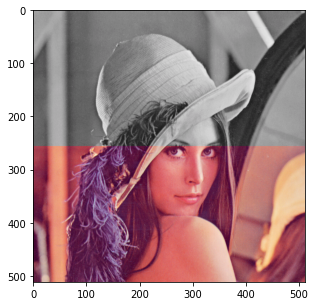

(512, 512, 3)

In [ ]:
im_RGB = HSI2RGB(im_HSI)

plt.figure(figsize = (5,5))
plt.imshow(im_RGB)
plt.show() 
im_RGB.shape

### Comentários
Um problema na transformação de RGB para HSI é na expressão do ângulo theta o denominador será 0 quando R = G = B, por isso foi adicionado um pequeno número ao mesmo para evitar esse erro no código.

Foi possível obter um resultado praticamente idêntico ao original ao realizar a transformação de HSI para RGB novamente.

## Questão 2

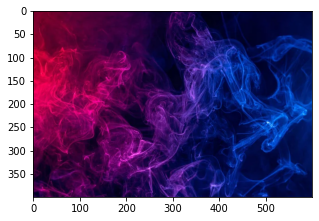

(400, 600, 3)

In [ ]:
# Carrega a imagem original
im = cv2.imread('/content/drive/MyDrive/PDI/Listas/Lista2/colorful-red-blue.png')
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
# im = np.array(plt.imread('/content/drive/MyDrive/PDI/Listas/Lista2/colorful-red-blue.png'))
# im = im[:,:,0:3]

plt.figure(figsize = (5,5))
plt.imshow(im)
plt.show() 
im.shape

In [ ]:
# Geração do histograma

def histograma(image):
    vet = np.zeros(256, dtype=np.uint64)
    teste = image.ravel()
    for pixel in teste:
        vet[int(pixel)] = vet[int(pixel)]+1
    return vet
    
# Equalização global de histograma

def equalize(image):
    hist = histograma(image)
    image_eq = np.zeros(image.shape)
    cdf = np.cumsum(hist)
    s = ((cdf - 0) / (image.shape[0]*image.shape[1] - 0)) * 255
    s = np.round(s)
    image_eq = s[image].astype(np.uint64)
    return image_eq


In [ ]:
# Equalização usando canais R, G e B

eq1_im = np.zeros(im.shape).astype(np.uint64)
eq1_im[:,:,0] = equalize(im[:,:,0].astype(np.uint64))
eq1_im[:,:,1] = equalize(im[:,:,1].astype(np.uint64))
eq1_im[:,:,2] = equalize(im[:,:,2].astype(np.uint64))


In [ ]:
# Equalização usando canal I

im_HSI = RGB2HSI(im)
eq_HSI = im_HSI.copy()
eq_HSI[:,:,2] = equalize(eq_HSI[:,:,2])
eq2_im = HSI2RGB(eq_HSI) # retorna valores fora do intervalo [0,255]
eq2_im = (eq2_im-np.min(eq2_im))/(np.max(eq2_im)-np.min(eq2_im))*255 # deixando os valores no intervalo [0,255]
eq2_im = eq2_im.astype(np.uint64) 


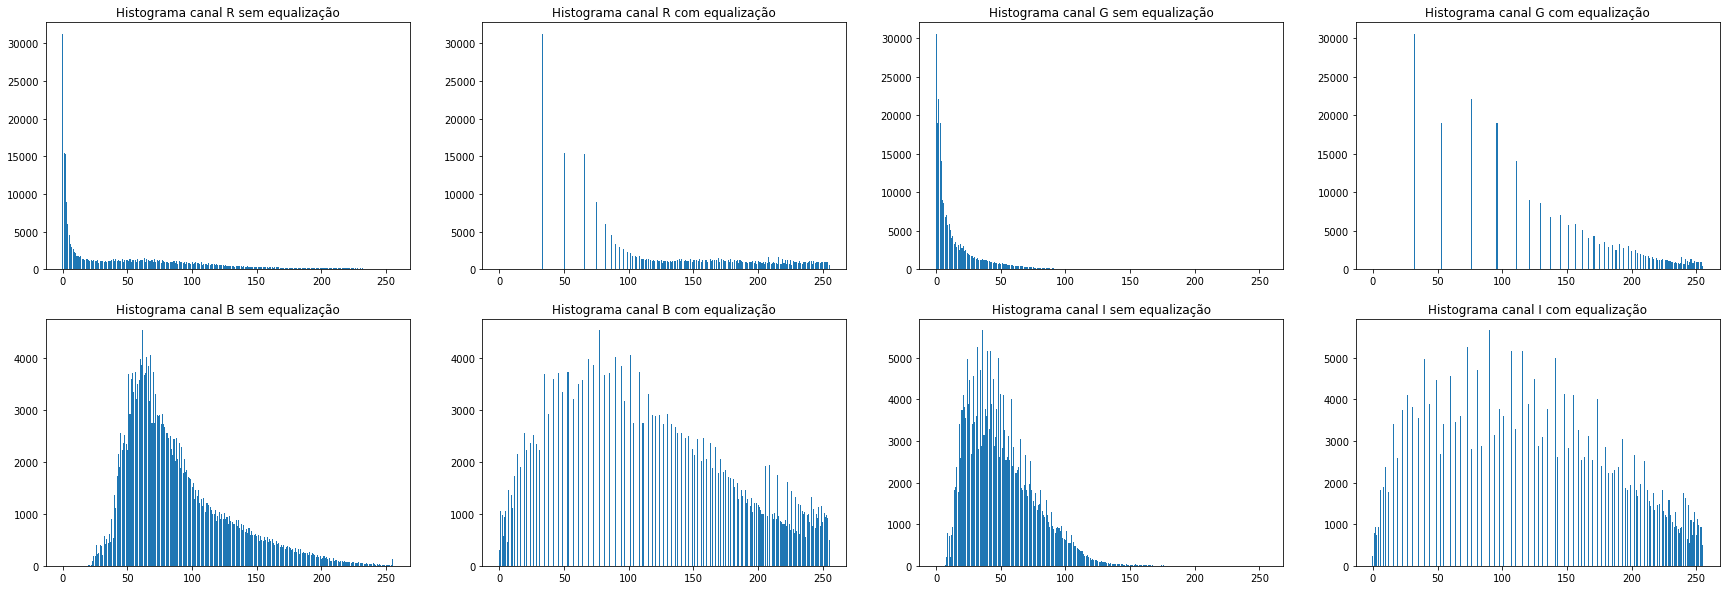

In [ ]:
# Plot dos histogramas

fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(30, 10))
axs[0,0].bar(range(0,256),histograma(im[:,:,0]))
axs[0,1].bar(range(0,256),histograma(eq1_im[:,:,0]))
axs[0,2].bar(range(0,256),histograma(im[:,:,1]))
axs[0,3].bar(range(0,256),histograma(eq1_im[:,:,1]))
axs[1,0].bar(range(0,256),histograma(im[:,:,2]))
axs[1,1].bar(range(0,256),histograma(eq1_im[:,:,2]))
axs[1,2].bar(range(0,256),histograma(im_HSI[:,:,2]))
axs[1,3].bar(range(0,256),histograma(eq_HSI[:,:,2]))
axs[0,0].set_title('Histograma canal R sem equalização')
axs[0,1].set_title('Histograma canal R com equalização');
axs[0,2].set_title('Histograma canal G sem equalização');
axs[0,3].set_title('Histograma canal G com equalização');
axs[1,0].set_title('Histograma canal B sem equalização')
axs[1,1].set_title('Histograma canal B com equalização');
axs[1,2].set_title('Histograma canal I sem equalização');
axs[1,3].set_title('Histograma canal I com equalização');
plt.show() 


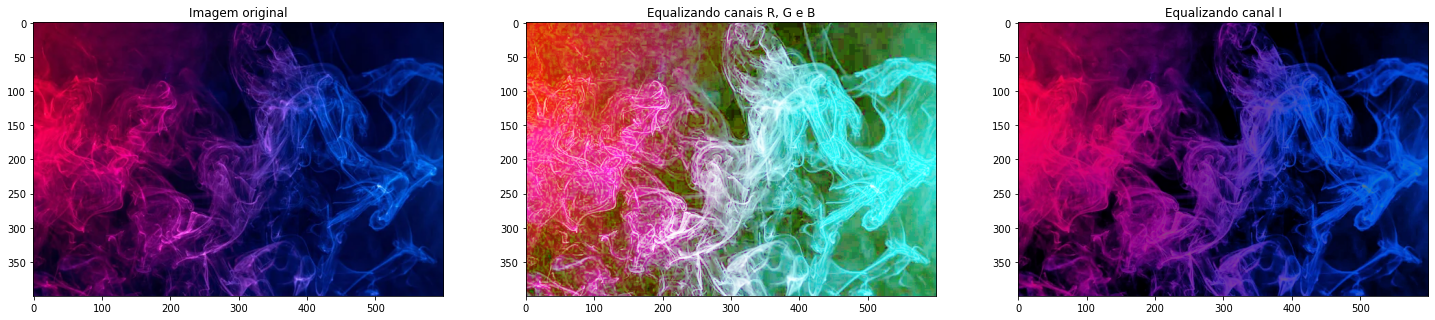

In [ ]:
# Plot das imagens

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(25, 25))
axs[0].imshow(im,cmap='gray',vmin=0,vmax=255)
axs[1].imshow(eq1_im,cmap='gray',vmin=0,vmax=255)
axs[2].imshow(eq2_im,cmap='gray',vmin=0,vmax=255)
axs[0].set_title('Imagem original')
axs[1].set_title('Equalizando canais R, G e B');
axs[2].set_title('Equalizando canal I');
plt.show()

### Comentários
O resultado encontrado para equalização usando os canais R, G e B separadamente não foi satisfatória, desvirtuando as cores originais. Isso porque as combinações R, G, B ficam bem diferentes. Percebe-se que nas regiões mais escuras apareceu uma coloração verde que não existia na original, o que não é aceitável. Pecebe-se que o resultado de equalização do canal de intensidade da imagem em HSI foi melhor já que manteve as regiões com as mesmas cores, pois ele mantém o canal de matiz e saturação sem alteração.

## Questão 3

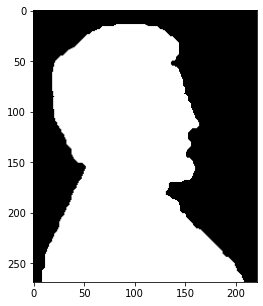

(269, 221)

In [ ]:
# Carrega a imagem original

im = np.array(plt.imread('/content/drive/MyDrive/PDI/Listas/Lista2/Fig9.14(a).jpg'))

plt.figure(figsize = (5,5))
plt.imshow(im,cmap='gray',vmin=0,vmax=255)
plt.show() 
im.shape


In [ ]:
# Certificando que a imagem está binarizada

def binary_image(image,threshold):
    image_bin = np.empty_like(image)
    for l in range(image.shape[0]):
        for c in range(image.shape[1]):
            if threshold >= image[l][c]:
                image_bin[l][c] = 0
            else:
                image_bin[l][c] = 255
    return image_bin

im = binary_image(im,120)


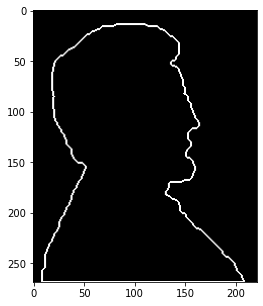

(269, 221)

In [ ]:
# Obtendo a fronteira do objeto

im2 = morphology.dilation(im)-morphology.erosion(im)

# Fechando o objeto a fim de preenche-lo
im2[268,10:207] = 255*np.ones((197))

plt.figure(figsize = (5,5))
plt.imshow(im2,cmap='gray',vmin=0,vmax=255)
plt.show() 
im2.shape


In [ ]:
# Algoritmo de Reconstrução Morfológica por Dilatação

def rmd(F,G):
    result = F[:,:]
    while True:
        last_result = result[:,:]
        result = morphology.dilation(last_result)
        result = result * G
        if np.sum(result - last_result) == 0:
            break
    return result.astype(np.uint64)


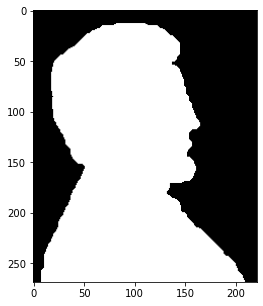

(269, 221)

In [ ]:
# Preenchimento de buracos

def full_hole(image):

    image = (image/255).astype(np.uint64)

    F = np.zeros(image.shape)
    F[0,:] = 1 - image[0,:]
    F[image.shape[0]-1,:] = 1 - image[image.shape[0]-1,:]
    F[:,0] = 1 - image[:,0]
    F[:,image.shape[1]-1] = 1 - image[:,image.shape[1]-1]
    
    F = F.astype(np.uint64)
    
    im_c = (1-image)

    result = 1 - rmd(F,im_c)

    return result

result = full_hole(im2)

plt.figure(figsize = (5,5))
plt.imshow(result,cmap='gray',vmin=0,vmax=1)
plt.show() 
result.shape


### Comentários
Ao início, a imagem foi binarizada para permitir que não influenciasse nos procedimentos seguintes. A fronteira do obejto foi obtida fazendo o gradiente da imagem ao subtrair a imagem dilatada da imagem erodida. 

Para utilizar o algorítmo de reconstrução morfológica automatizado, precisou-se fechar a borda inferior da silhueta. Dessa forma, aplicou-se o que mostra na Equação 9.5-29 bem como exemplificado na Figura 9.30 (pág. 436 do livro texto).

Criou-se um matriz de marcador F que é 0 em todos os lugares exceto nas bordas, foi feita a dilatação e tirada a interseção com o complemento da imagem até que não houvesse mais diferença entre o ultimo resultado e o resultado atual.


## Questão 4

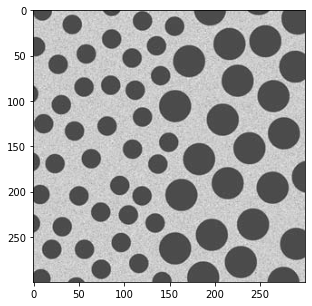

(300, 300)

In [ ]:
# Carrega a imagem original
im = np.array(plt.imread('/content/drive/MyDrive/PDI/Listas/Lista2/Figura 9.43.png'))

plt.figure(figsize = (5,5))
plt.imshow(im,cmap='gray',vmin=0,vmax=1)
plt.show() 
im.shape

In [ ]:
# Funções de abertura e fechamento

def fechamento(image, mask):
    image = morphology.dilation(image,mask)
    new_image = morphology.erosion(image,mask)
    return new_image

def abertura(image, mask):
    image = morphology.erosion(image,mask)
    new_image = morphology.dilation(image,mask)
    return new_image


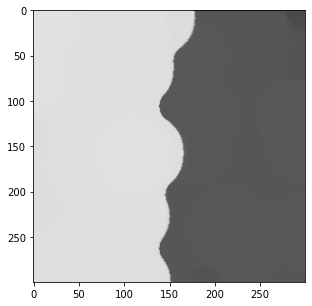

(300, 300)

In [ ]:
# Fazendo abertura e fechamento da imagem

im2 = fechamento(im, morphology.disk(15))
im3 = abertura(im2, morphology.disk(40))


plt.figure(figsize = (5,5))
plt.imshow(im3,cmap='gray',vmin=0,vmax=1)
plt.show() 
im3.shape

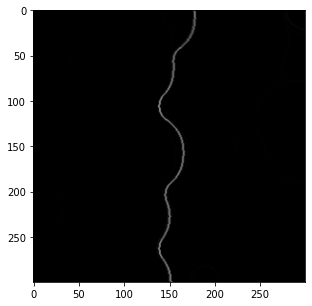

(300, 300)

In [ ]:
# Aplicando o gradiente
gradient = morphology.dilation(im3) - morphology.erosion(im3)

plt.figure(figsize = (5,5))
plt.imshow(gradient,cmap='gray',vmin=0,vmax=1)
plt.show() 
gradient.shape

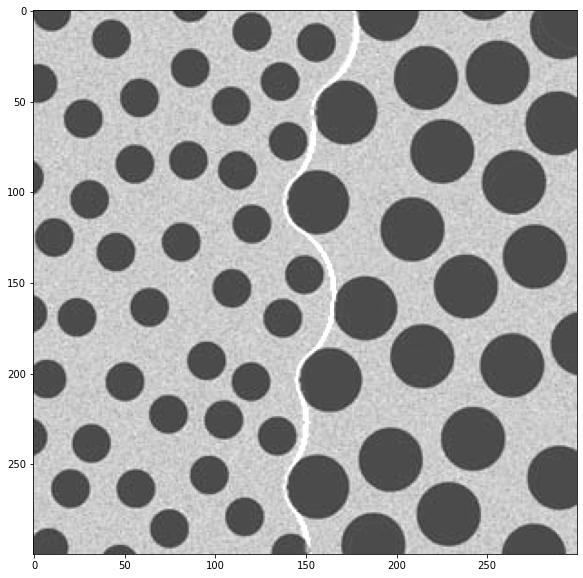

(300, 300)

In [ ]:
# Somando a imagem original com o gradiente
img_final = im + gradient

plt.figure(figsize = (10,10))
plt.imshow(img_final,cmap='gray',vmin=0,vmax=1)
plt.show() 
img_final.shape

### Comentários
Foram criadas as funções de fechamento e abertura utilizando dilation e erosion da biblioteca skimage.morphology.

O raio das bolinhas menores é de 10 pixels e o raio das bolinhas maiores é de 20 pixels, em média. Foi feito um fechamento utilizando uma máscara de raio 15, para ser maior que o raio das bolinhas menores e menor que o das maiores. Em seguida foi feita uma abertura usando uma máscara de raio 40, já que é maior que os raios das bolinhas maiores.

Agora com a imagem segmentada em duas regiões (região clara das menores e escura das maiores), aplicou-se o gradiente para obtenção da fronteira dessas das duas regiões, da mesma forma que foi feito na questão 3. Ao final, foram somadas a imagem original com a imagem da fronteira e apresentado o resultado.

## Questão 5

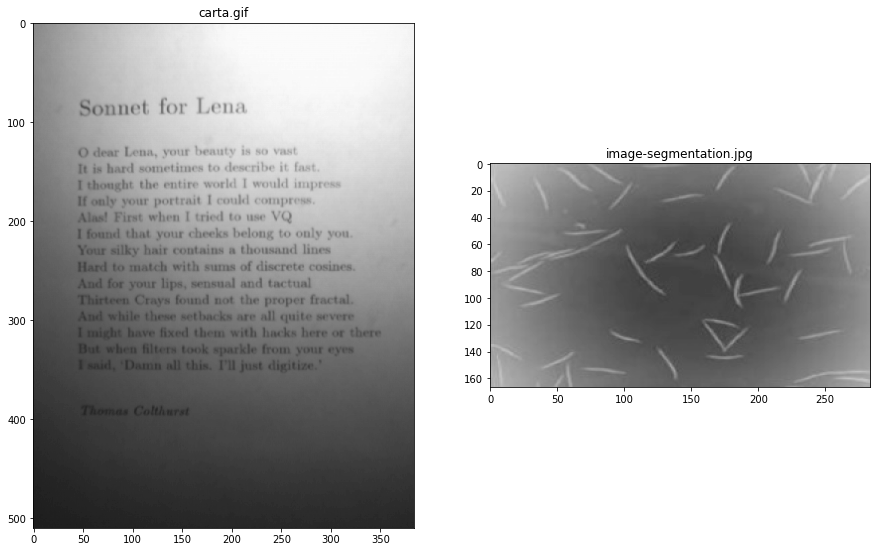

(510, 384)

In [ ]:
# Carrega as imagens originais
im1 = np.array(plt.imread('/content/drive/MyDrive/PDI/Listas/Lista2/carta.gif'))
im2 = np.array(plt.imread('/content/drive/MyDrive/PDI/Listas/Lista2/image-segmentation.jpg'))
im1 = im1[:,:,0]
im2 = im2[:,:,0]

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 15))
axs[0].imshow(im1,cmap='gray',vmin=0,vmax=255)
axs[1].imshow(im2,cmap='gray',vmin=0,vmax=255)
axs[0].set_title('carta.gif')
axs[1].set_title('image-segmentation.jpg');
plt.show()
im1.shape

In [ ]:
# Limiarização usando o método das Médias Móveis

def mov_avarage(image, n, b):

    image_change = image.copy()
    for l in range(image.shape[0]):
        if l % 2 == 1:
            image_change[l,:] = np.flip(image_change[l,:])
    z = np.ravel(image_change)

    m = np.zeros(z.shape)

    for k in range(0,z.shape[0]):
        if k == 0:
            m[k] = z[k]/n
        elif k < n - 1:
            m[k] = sum(z[0:k+1])/len(z[0:k+1])
        else:
            m[k] = 1/n * sum(z[k+1-n:k+1])

    result = np.zeros(z.shape, dtype=np.uint64)
    result[z > b * m] = 255
    
    m1 = np.reshape(result,image.shape)
    m2 = m1.copy()

    for l in range(image.shape[0]):
        if l % 2 == 1:
            m2[l,:] = np.flip(m2[l,:])

    return m2


In [ ]:
# Limiarização global ótima usando método de Otsu

def top_hat(image,mask):
    return image - abertura(image,mask)

def prob(image):
    vet = np.zeros(256)
    teste = image.ravel()
    for pixel in teste:
        vet[pixel] += 1
    vet = vet/(image.shape[0]*image.shape[1])
    
    p = []
    for i in range(len(vet)):
        if vet[i] != 0:
            p.append(vet[i])
    p = np.array(p)
    L = p.shape[0]
    return p, L

def media_acum(p):
    L = p.shape[0]
    m = np.zeros(L)
    for k in range(L):
        m[k] = np.sum(np.array(range(0,k+1)) * p[0:k+1])
    return m

def find_k(p,P1,m):
    L = p.shape[0]
    mg = np.sum(np.array(range(0,L)) * p)
    var_class = (mg * P1 - m)**2 / (P1 * (1 - P1))
    var_max = np.max(var_class)
    n = np.count_nonzero(var_class == var_max)

    k_star = [] 
    for k in range(L):
        if var_class[k] == var_max:
            k_star.append(k)
            n -= 1
            if n == 0:
                break
    k_star = np.mean(np.array(k_star))
    n_star = var_max / np.sum((np.array(range(0,L)) - mg)**2 * p)

    return k_star, n_star

def otsu(image):

    new_image = np.zeros(image.shape)

    p, L = prob(image)
    P1 = np.cumsum(p)
    m = media_acum(p)

    k_star, n_star = find_k(p,P1,m)

    new_image[image > k_star] = 255
    return new_image


In [ ]:
im1_mov = mov_avarage(im1,20,0.92)
im2_mov = mov_avarage(im2,40,1.2)
im1_otsu = otsu(top_hat(im1,morphology.disk(3)))
im2_otsu = otsu(top_hat(im2,morphology.square(5)))

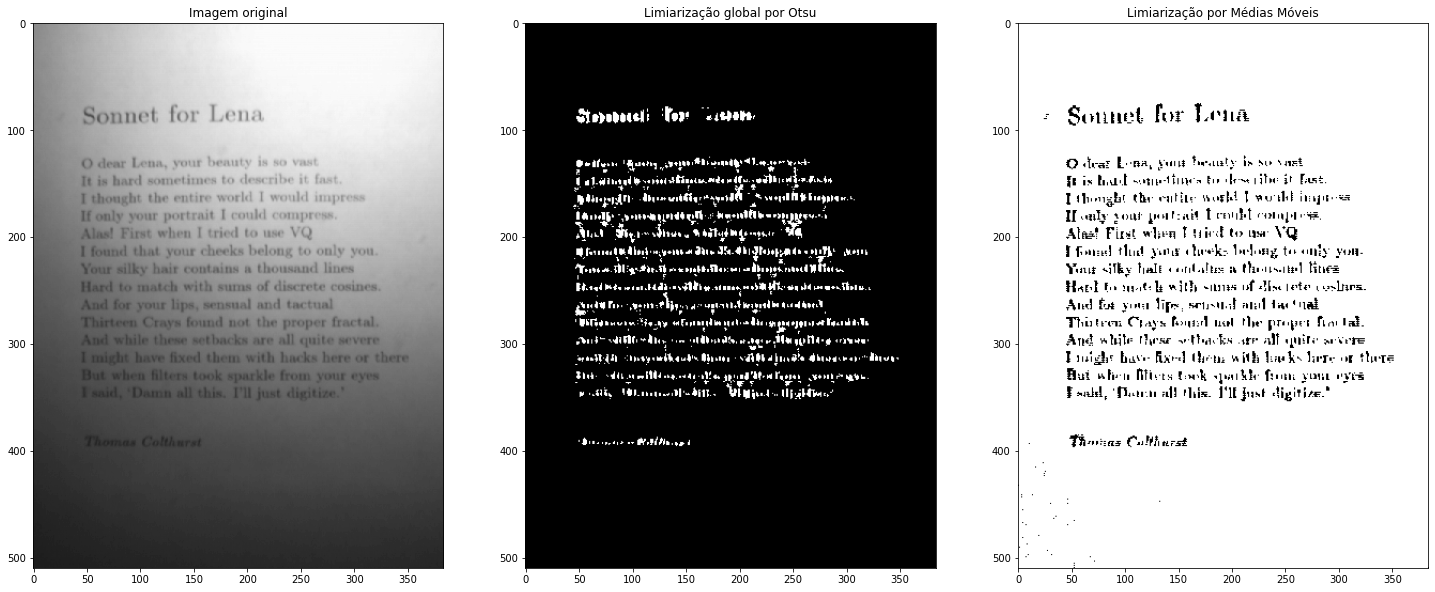

In [ ]:
# Plot das imagens

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(25, 25))
axs[0].imshow(im1,cmap='gray',vmin=0,vmax=255)
axs[1].imshow(im1_otsu,cmap='gray',vmin=0,vmax=255)
axs[2].imshow(im1_mov,cmap='gray',vmin=0,vmax=255)
axs[0].set_title('Imagem original')
axs[1].set_title('Limiarização global por Otsu');
axs[2].set_title('Limiarização por Médias Móveis');
plt.show()

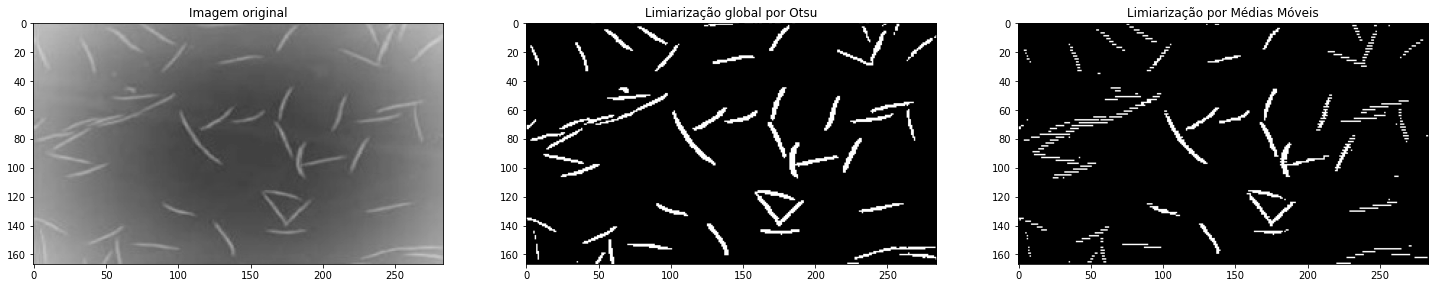

In [ ]:
# Plot das imagens

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(25, 25))
axs[0].imshow(im2,cmap='gray',vmin=0,vmax=255)
axs[1].imshow(im2_otsu,cmap='gray',vmin=0,vmax=255)
axs[2].imshow(im2_mov,cmap='gray',vmin=0,vmax=255)
axs[0].set_title('Imagem original')
axs[1].set_title('Limiarização global por Otsu');
axs[2].set_title('Limiarização por Médias Móveis');
plt.show()

### Comentários
Como são imagens diferentes, duas abordagens foram aplicadas: método de Otsu e Médias Móveis.

Dos métodos utilizados na imagem 1, o método de médias móveis permitiu uma leitura parcial do documento com mais clareza. Não é por acaso que esse método é muito usado no processamento de documentos.

Primeiro, as linhas ímpares da matriz de pixels da imagem foram invertidas. Depois essa matriz foi "achatada" em forma de vetor, de forma que quando o vetor é percorrido, seria o mesmo que percorrer a imagem original em zigue-zague. Assim foi aplicada a equação 10.3-38 e foram seguidas as recomendações do Exemplo 10.22 (pág. 500 do livro texto). Encontrando m, foi feita a segmentação e depois devolvida o formato orginal da imagem.

Já na imagem 2, o melhor resultado obtido foi com o método de Otsu. Foi encontrado o histograma da imagem e normalizado. Foi encontrado o vetor de probabilidades das intensidades presentes na imagem. A partir desse vetor, do vetor de suas somas acumuladas e de suas média acumuladas, foi possível encontra um valor k* para ser usado de limiar e, assim, segmentar a imagem (pág. 492 do livro texto).

## Questão 6

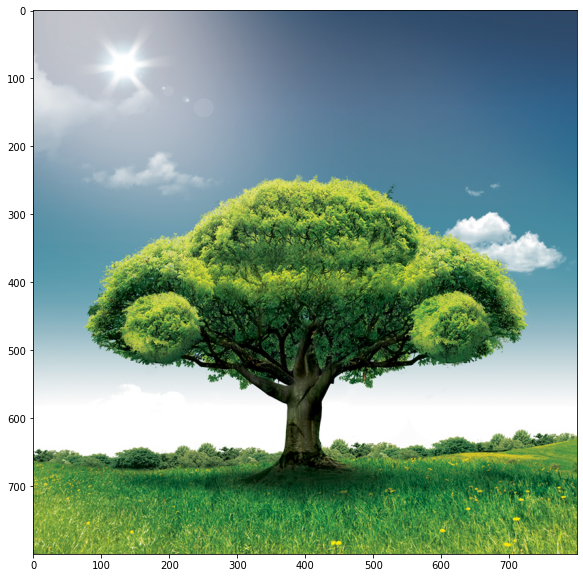

(800, 800, 3)

In [ ]:
# Carrega a imagem original
im = np.array(plt.imread('/content/drive/MyDrive/PDI/Listas/Lista2/tree_car_by_hansenhui.jpg'))
plt.figure(figsize = (10,10))
plt.imshow(im)
plt.show() 
im.shape

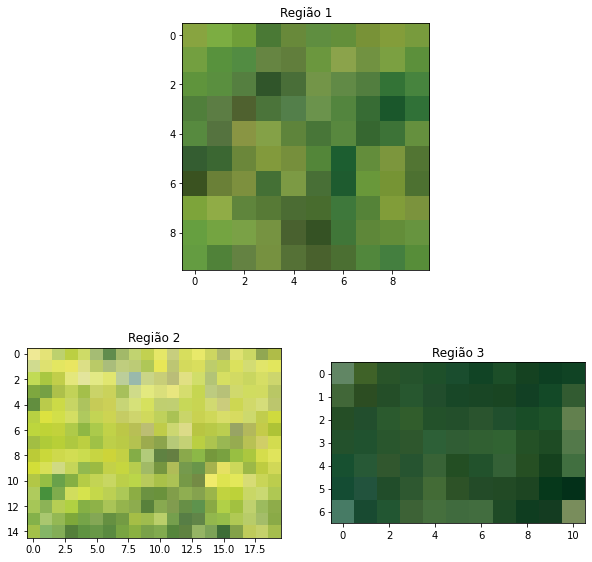

In [ ]:
# Escolhendo 3 regiões de sementes

treetop_reg1 = im[355:365,485:495,:]
treetop_reg2 = im[355:370,190:210,:]
treetop_reg3 = im[441:448,82:93,:]

fig = plt.figure() 
fig.set_figheight(10) 
fig.set_figwidth(10) 

ax1 = plt.subplot2grid(shape=(2, 2), loc=(0, 0), colspan=2) 
ax2 = plt.subplot2grid(shape=(2, 2), loc=(1, 0), colspan=1)
ax3 = plt.subplot2grid(shape=(2, 2), loc=(1, 1), colspan=1)

ax1.imshow(treetop_reg1,cmap='gray',vmin=0,vmax=255)
ax1.set_title('Região 1') 
ax2.imshow(treetop_reg2,cmap='gray',vmin=0,vmax=255)
ax2.set_title('Região 2') 
ax3.imshow(treetop_reg3,cmap='gray',vmin=0,vmax=255)
ax3.set_title('Região 3') 

plt.show()

In [ ]:
# Vetor de medias e desvio padrão RGB

def RGB2coord(image):
    coord = np.reshape(image,(image.shape[0]*image.shape[1],image.shape[2]))

    return coord

reg1 = RGB2coord(treetop_reg1)
reg2 = RGB2coord(treetop_reg2)
reg3 = RGB2coord(treetop_reg3)

amostras = np.vstack((reg1,reg2,reg3))

def media(amostras):
    a = np.zeros(amostras.shape[1]).astype(np.uint64)
    for c in range(amostras.shape[1]):
        a[c] = np.sum(amostras[:,c])/amostras.shape[0]
    return a

def desvio(amostras):
    std_dev = np.zeros(amostras.shape[1]).astype(np.uint64)
    for c in range(amostras.shape[1]):
        a = media(amostras)
        std_dev[c] = np.sqrt(np.sum(np.square(amostras[:,c]-a[c]))/amostras.shape[0])
    return std_dev


In [ ]:
# Segmentação no espaço de vetores RGB

def coordRGB2bin(im_coordRGB,a,std_dev,k):
    im_coordbin = np.zeros(im_coordRGB[:,0].shape)
    for l in range(im_coordRGB.shape[0]):
        if (im_coordRGB[l,0] >= a[0]-k*std_dev[0]) and (im_coordRGB[l,0] <= a[0]+k*std_dev[0]):
            if (im_coordRGB[l,1] >= a[1]-k*std_dev[1]) and (im_coordRGB[l,1] <= a[1]+k*std_dev[1]):
                if (im_coordRGB[l,2] >= a[2]-k*std_dev[2]) and (im_coordRGB[l,2] <= a[2]+k*std_dev[2]):
                    im_coordbin[l] = 255
    return im_coordbin


In [ ]:
# Segmentação feita para cada região separadamente e depois somadas

im_coordbin1 = coordRGB2bin(RGB2coord(im),media(reg1),desvio(reg1),3)            
im_coordbin2 = coordRGB2bin(RGB2coord(im),media(reg2),desvio(reg2),3)            
im_coordbin3 = coordRGB2bin(RGB2coord(im),media(reg3),desvio(reg3),3)

im_coordbin = im_coordbin1 + im_coordbin2 + im_coordbin3
im_coordbin[im_coordbin > 0] = 255

# Reshape para mxn

im_bin = np.reshape(im_coordbin,(im.shape[0],im.shape[1]))


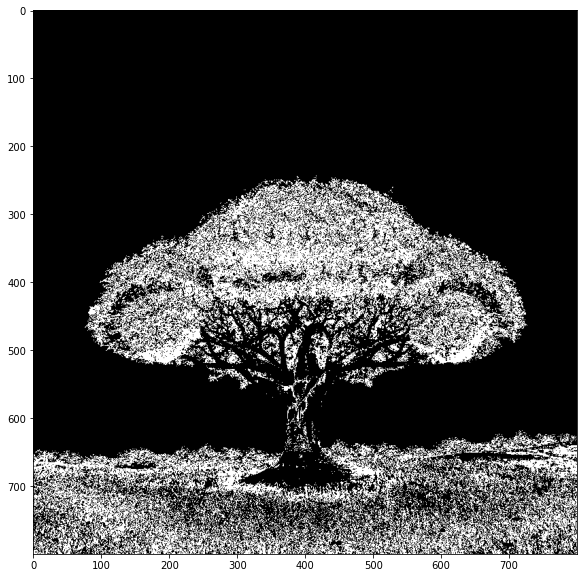

(800, 800)

In [ ]:
plt.figure(figsize = (10,10))
plt.imshow(im_bin,cmap='gray',vmin=0,vmax=255)
plt.show() 
im_bin.shape


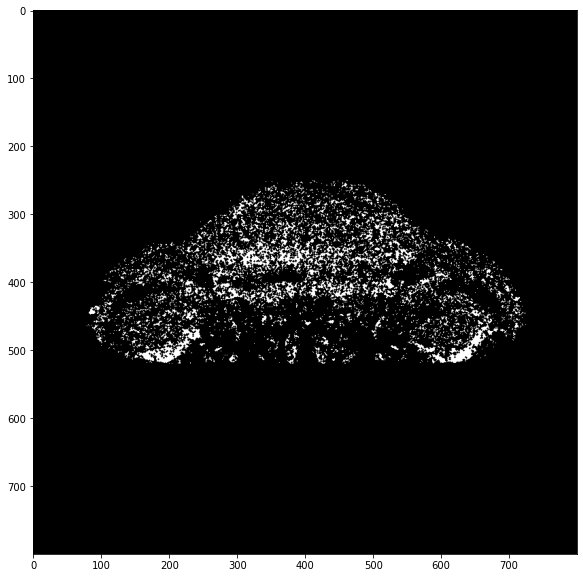

(800, 800)

In [ ]:
# Escolhendo as sementes

# Erodir cada componente conectado a um pixel

seed_img = morphology.erosion(im_bin)

# Escolher sementes da copa
seed_img[520:800,:] = np.zeros(seed_img[520:800,:].shape)
seed_img[0:250,:] = np.zeros(seed_img[0:250,:].shape)

''' # Adicionar mais algumas sementes
seed_img[410:430,120:200] = 255
seed_img[410:430,620:670] = 255
 '''

plt.figure(figsize = (10,10))
plt.imshow(seed_img,cmap='gray',vmin=0,vmax=255)
plt.show() 
seed_img.shape



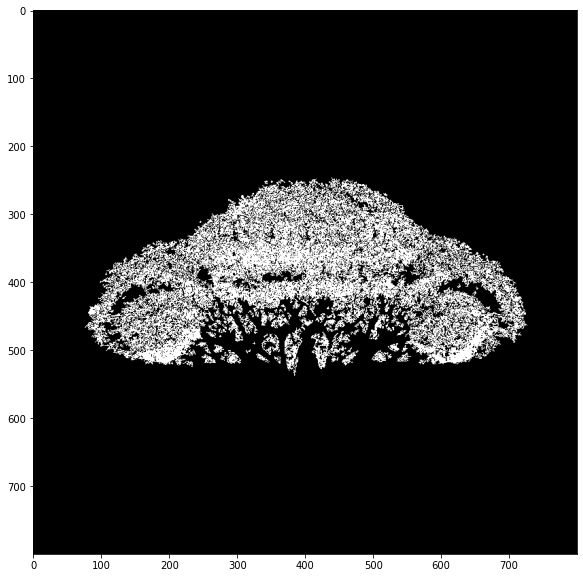

(800, 800)

In [ ]:
def growing(grow_img,image):
    seeds = []
    for l in range(grow_img.shape[0]):
        for c in range(grow_img.shape[1]):
            if grow_img[l][c] == 255:
                seeds.append((l,c))
    # Vizinhança 8
    directs = [(-1,-1), (0,-1), (1,-1), (1,0), (1,1), (0,1), (-1,1), (-1,0)]
    visited = np.zeros((image.shape), dtype=np.uint8)

    while len(seeds):
        seed = seeds.pop(0)
        l = seed[0]
        c = seed[1] 
        # ponto já visitado (l,c)
        visited[l][c] = 1
        for direct in directs:
            l_atual = l + direct[0]
            c_atual = c + direct[1]
            # verifica se está nas bordas da imagem 
            if c_atual < 0 or l_atual < 0 or c_atual >= im.shape[1] or l_atual >= im.shape[0]:
                continue
            # verifica se já foi visitado e pertence ao mesmo objeto 
            if (not visited[l_atual][c_atual]) and (image[l_atual][c_atual] == image[l][c]):
                grow_img[l_atual][c_atual] = 255
                visited[l_atual][c_atual] = 1
                seeds.append((l_atual,c_atual))
    return grow_img


out_img = growing(seed_img,im_bin)



plt.figure(figsize = (10,10))
plt.imshow(out_img,cmap='gray',vmin=0,vmax=255)
plt.show() 
out_img.shape

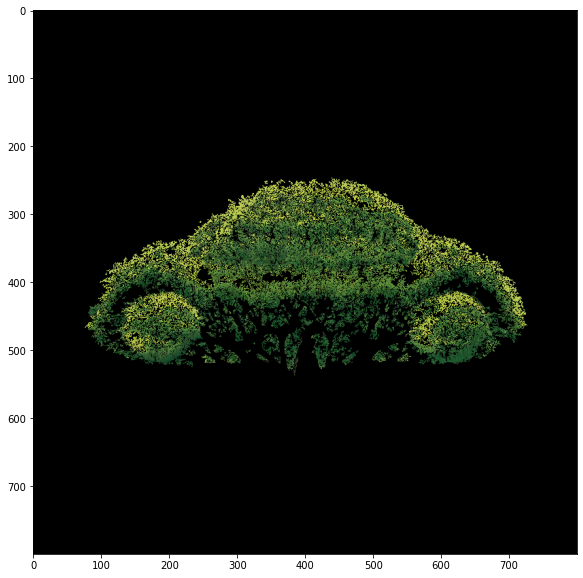

(800, 800, 3)

In [ ]:
# Recuperando cores

im_copa = np.dstack([out_img,out_img,out_img])
im_copa = (im_copa/255 * im).astype(np.uint64)

plt.figure(figsize = (10,10))
plt.imshow(im_copa,cmap='gray',vmin=0,vmax=255)
plt.show() 
im_copa.shape

### Comentários
Primeiro foram selecionadas 3 regiões da copa escolhidas proposiltalmente para apresentarem 3 variações bem distintas da cor verde presente. 

Essas regiões foram usadas como 3 amostras para realizar uma segmentação utilizando vetores RGB para cada amostra. Ao final da segmentação, juntou-se os resultados em uma unica imagem. Percebeu-se que a imagem obtida possuia majoritariamente pixels de 255 na região da copa e na região da grama, onde ambas possuem a cor verde.

A próxima etapa foi a seleção das sementes. Escolhidas sementes apenas da região da copa e foi usada a erosão da imagem, como foi abordado no livro texto.

A ultima etapa foi o processo de growing em que temos uma imagem com sementes e a imagem original que possui pixels de 255 na copa e na grama. O que se fez foi criar uma lista de localizações das sementes e foi se verificando as vizinhas dos pixels pertencentes a essa lista. Caso esse pixel vizinho tivesse valor igual ao da imagem original na posição da semente, o pixel vizinho da imagem de sementes recebe 255 e suas coordenadas vão para lista de sementes. A cada iteração feita, a lista de sementes diminui a medida que o pixel já foi verificado. O processo termina quando a lista de sementes acaba.

## Questão 7

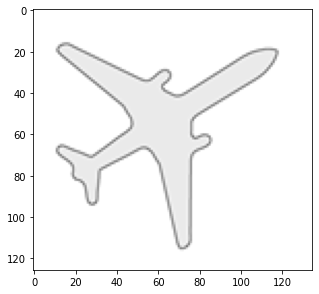

(126, 135)

In [ ]:
# Carrega a imagem original
im = cv2.imread('/content/drive/MyDrive/PDI/Listas/Lista2/11.43.bmp')
im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
plt.figure(figsize = (5,5))
plt.imshow(im,cmap='gray',vmin=0,vmax=255)
plt.show() 
im.shape


In [ ]:
def hotelling(image):
    K = []
    for l in range(image.shape[0]):
        for c in range(image.shape[1]):
            if image[l,c] != 255:
                K.append([l,c])
    K = np.array(K).T

    media = np.mean(K,axis=1).reshape((K.shape[0],1))

    cov = (np.dot(K,K.T)-K.shape[1]*np.dot(media,media.T))/K.shape[1] 

    U,S,A = np.linalg.svd(cov, full_matrices=True)
    K_new = np.dot(A, K - media)

    a = 5
    b = 5
    K_new = K_new + np.ones(K_new.shape) * (np.array([[a,b]]).T - np.amin(K_new, axis=1).reshape(2,1))
    K_new = np.round(K_new).astype(np.uint64)


    k = 0
    new_image = 255*np.ones(image.shape)
    for l in range(image.shape[0]):
        for c in range(image.shape[1]):        
            if image[l,c] != 255:
                i = K_new[1,k]
                j = K_new[0,k]

                new_image[i,j] = image[l,c]
                k += 1
    return new_image

rotated_image1 = hotelling(im)


In [ ]:
def rotate_bycov(image,offset): # rotação a partir da matriz de covariancia
    K = []
    for l in range(image.shape[0]):
        for c in range(image.shape[1]):
            if image[l,c] != 255:
                K.append([l,c])
    K = np.array(K).T

    media = np.mean(K,axis=1).reshape((K.shape[0],1))

    cov = (np.dot(K,K.T)-K.shape[1]*np.dot(media,media.T))/K.shape[1]

    eigval, eigvet = np.linalg.eig(cov)

    if eigval[0] < eigval[1]:
        dir = eigvet[:,0]
    else:
        dir = eigvet[:,1]

    angle = -np.rad2deg(np.arctan(dir[1]/dir[0]))

    center = (image.shape[1] / 2, image.shape[0] / 2)

    ref_point = center - np.array([offset,offset])
    M = cv2.getRotationMatrix2D(ref_point, angle, 1)

    rotated_image = cv2.warpAffine(image, M, (image.shape[1], image.shape[0]),
                           borderMode=cv2.BORDER_CONSTANT,
                           borderValue=(255))
    return rotated_image

rotated_image2 = rotate_bycov(im,20)


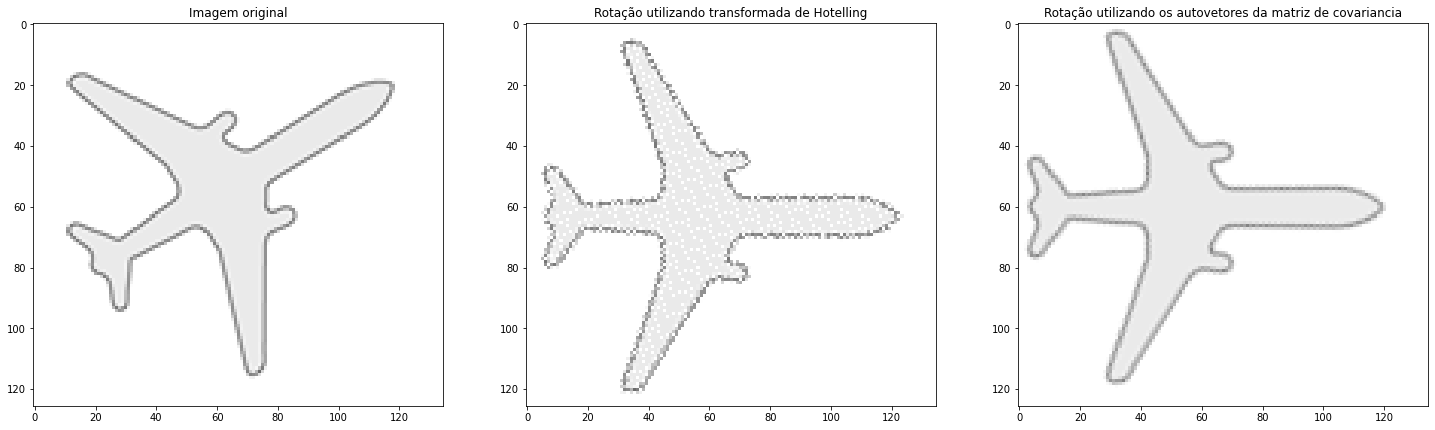

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(25, 25))
axs[0].imshow(im,cmap='gray',vmin=0,vmax=255)
axs[1].imshow(rotated_image1,cmap='gray',vmin=0,vmax=255)
axs[2].imshow(rotated_image2,cmap='gray',vmin=0,vmax=255)
axs[0].set_title('Imagem original')
axs[1].set_title('Rotação utilizando transformada de Hotelling');
axs[2].set_title('Rotação utilizando os autovetores da matriz de covariancia');
plt.show()

### Comentários
Foram abordadas duas formas de se realizar a rotação utilizando o princípio dde transformada de Hotelling. 
A primeira foi encontrando a matriz de transformação A a partir da decomposição em valor singular da matriz de covariância para encontrar as coordenadas dos pontos na nova imagem. 

A segunda foi encontrando os autovetores e autovalores da matriz de covariância e utilizando a direção dado por um destes (o autovetor associado ao maior autovalor de acordo com o livro texto) para realizar a rotação com uma função encontrada na biblioteca do OpenCV. O ponto de referência para realizar a rotação não foi o centro da imagem, pois rotacionar em relação a centro estava cortando a asa do avião. Por isso foi adicionado um offset em relação ao centro na função.

É possível perceber que na primeira abordagem a imagem sofre um "picotamento", isso porque após encontrar novos valores de coordenadas, estas precisam ser arredondadas para o inteiro mais próximo, gerando distorções na saída. Essa forma teria melhores resultados para imagens de alta resolução em que a distância entre os pixels seja menor.

A segunda abordagem já apresentou um melhor resultado, pois só foi usado o conceito de Hotelling até aquisição dos autovetores e autovalores da matriz de covariância, permitindo determinar o ângulo de rotação a ser utilizada na função de rotação. 